#### DSC550-T301 
#### Chitramoy Mukherjee
####  Final Project Milestone-1
#### Analyze Mental health disorder in Tech Companies
#### Date: 1/14/2023

Introduction:
---------------

In recent years, the tech industry has experienced rapid growth and innovation, bringing about numerous opportunities and challenges. While technological advancements have transformed the way we work, they have also introduced new stressors that can impact the mental health of individuals working in this sector. Recognizing the importance of mental health in the workplace, this project aims to analyze mental health disorders within tech companies using Python.Mental health affects your emotional, psychological and social well-being.Mental health is a key factor todetermine the productivity of the employee in any industry and as a whole total performance of the company. If someone is not mentally fit, he can’t produce the expected output what he is capable of and it also impacts his co-workers performance and impacts the work environment.

Objective:
-------------

The primary objective of this project is to gain insights into the prevalence of mental health disorders among employees in the tech industry. By leveraging Python for data analysis, we aim to explore patterns, trends, and potential factors contributing to mental health issues. The analysis will be based on a dataset collected from surveys conducted within tech companies, covering a range of variables related to mental health. This sort of analysis helps the employer to identify and support an individual who may be experiencing a mental health or substance use concern or crisis and connect them with the appropriate employee resources.
This allows employer to recognize the signs of someone who maybe struggling and teaches them the skills to know when to reach out and what resources are available.Organizations that incorporate mental health awareness help to create a healthy and
productive work environment that reduces the stigma associated with mental illness, increases the organizations mental health literacy and teaches the skills to safely and responsibly respond to a co-workers mental health concern.

Key Components:
------------------

1. **Data Collection:**
   - Gather a comprehensive dataset from tech companies, including information on employee demographics, work-related factors, and self-reported mental health conditions.

2. **Data understanding and Preprocessing:**
   - Clean and preprocess the dataset to handle missing values, outliers, and ensure data quality. Transform categorical variables and standardize formats for analysis.

3. **Exploratory Data Analysis (EDA):**
   - Utilize Python libraries such as Pandas, Matplotlib, and Seaborn to conduct exploratory data analysis. Visualize distributions, correlations, and trends in mental health-related variables.

4. **Statistical Analysis:**
   - Apply statistical methods to identify significant factors influencing mental health disorders. Conduct hypothesis testing and regression analysis to establish relationships.

5. **Machine Learning Modeling:**
   - Develop machine learning models to predict the likelihood of mental health disorders based on relevant features. Evaluate model performance and interpret results.

6. **Recommendations and Insights:**
   - Provide actionable insights and recommendations for tech companies to improve mental health support for their employees.
   
Key benefits from the outcome of the project:
---------------------------------------------------------
By the end of this project, we aim to contribute valuable insights that can inform both employers and employees about mental health in the tech industry. This analysis can serve as a foundation for fostering a healthier and more supportive work environment both from employee and employer perspective. Employers can also offer robust benefit packages to support employees who go through mental health issues. That includes Employee Assistance Programs, Wellness programs that focus on mental and physical health, Health and Disability Insurance or flexible working schedules or time off policies.

Below are the key benefits of this analysis from Employer and Employee perspective :

1. Employee Well-being and Productivity.
2. Reduced Healthcare Costs.
3. Enhanced Employee Morale.
4. Legal Compliance and Corporate Responsibility.
5. Customized Support Programs.
6. Employee Engagement and Satisfaction Surveys.
7. Workplace Culture Improvement.

This topic is relevant to data science as we can analyze and identify the factors/variables that impacts the
mental health and justify the relations between variables which is closely related to determine the mental
health of employees.We can create a model and feed data into it to identify the employees mental health in
the company and provide directions to them to overcome the situation.

In [89]:
import warnings 
warnings.filterwarnings('ignore')

# Required python basic libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier




from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

### Reading the labeledTrainData.tsv file into DataFrame
df = pd.read_csv("C:\\Users\\14024\\OneDrive\\Desktop\\MS-DSC\\DSC-550\Week-6\\survey.csv")

# Display the first few rows of the DataFrame to ensure it's loaded properly
print(df)

df.columns

                Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  .

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

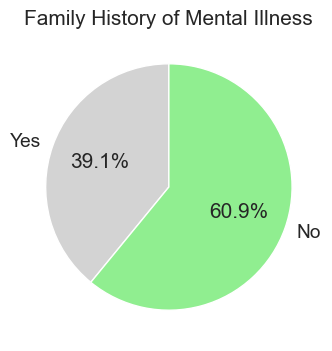

In [91]:
# Pie diagram of Family History of Mental illness
yes = len(df[df['family_history'] == 'Yes'])
no = len(df[df['family_history'] == 'No'])

count = [yes, no]
labels = ['Yes', 'No']
colors = ['lightgrey', 'lightgreen']

# Customizing the pie chart
plt.figure(figsize=(8,4))
explode = (0, 1, 1)  # Only the second slice will explode
pc = plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Family History of Mental Illness');

From this, we can see that almost 40% of respondents have a family history of mental illness. According to a 2017 study by the Arctic University of Norway, it was discovered that children with parents who had a severe mental illness had up to a 50% chance of developing a mental illness, and a 32% chance of developing a severe mental illness (bipolar disorder, major depressive disorder, schizophrenia, etc). We will look further into this when performing bivariate analysis.

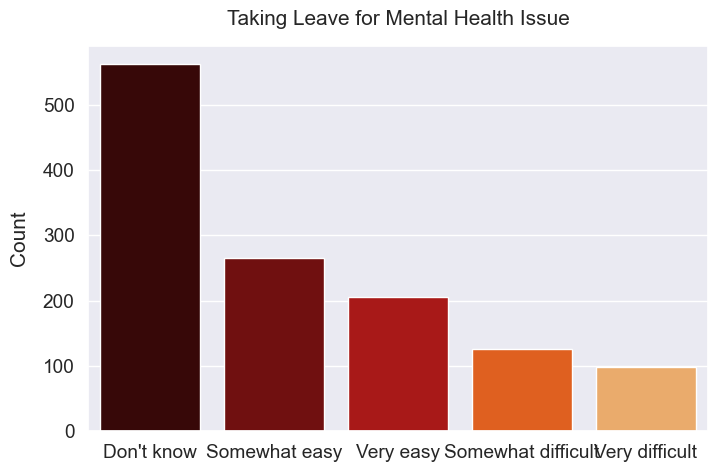

In [92]:
# Bar diagram plot of how ease to take leave due to mental health issue

df['leave'].value_counts().index
plt.figure(figsize=(8,5)) # Size of the figure

# Using value_counts(), we get the count of each answer in descending order, we then use .index to get an Index object, which
# we later pass into the order parameter of the countplot, sorting the plot in descending order
order = df['leave'].value_counts().index 

plt.title('Taking Leave for Mental Health Issue', pad=15);
mp = sns.countplot(x='leave', data=df, order=order, palette='gist_heat')
plt.ylabel('Count', labelpad=10)
mp.set(xlabel=None);

From the above plot, we can see that most respondents do not know whether they are even allowed to take leave for a mental health issue, and there are also quite a number who find it hard to do so, which may be due to the social stigma surrounding mental issues.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


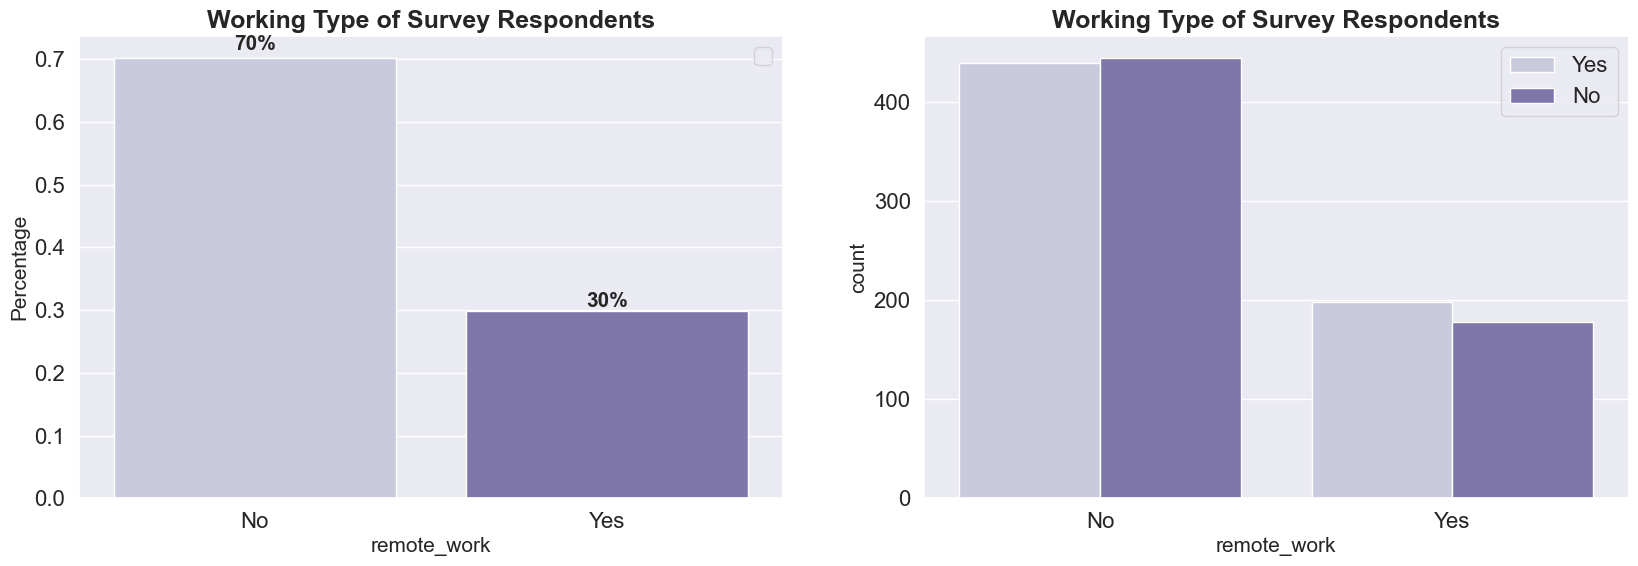

In [93]:
# Bar diagram plot of Working Type of Survey respondents
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['remote_work'], data = eda_percentage,  hue = df['treatment'], palette='Purples')
plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Around 70% of respondents don't work remotely, which means the biggest factor of mental health disorder came up triggered on the workplace. On the other side, it has slightly different between an employee that want to get treatment and don't want to get a treatment. The number of people who seek treatment in both the categories is more or less similar and it does not affect our target variable.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


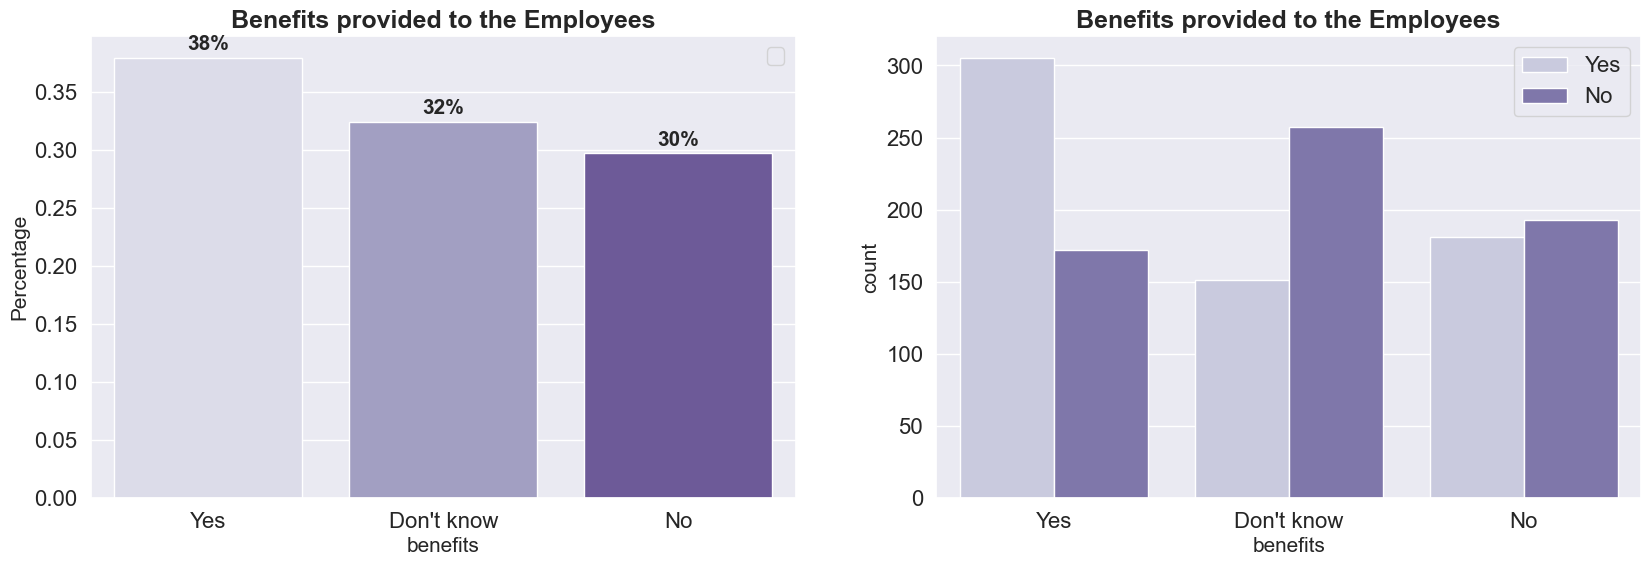

In [94]:
# Bar plot of benefits provided to the employees
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['benefits'], data = eda_percentage,  hue = df['treatment'], palette='Purples')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit. Coming to the second graph, we see that for the people who YES said to mental health benefits, around 63% of them said that they were seeking medical help. Surprisingly, the people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.

####  Final Project Milestone-2
#### Date: 1/31/2023

#### Drop any features that are not useful for your model building and explain why they are not useful.

In [95]:
# Visualize the data and identify the non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [96]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

Justification for the features dropped which might not be useful for model building.

Timestamp: This column might not provide useful information for predicting mental health issues. The timestamp is usually used for tracking when the survey was taken, which is not relevant for the analysis.

Comments: This column is likely to contain free-form text responses, which can be challenging to process and analyze. For simplicity and to focus on structured data, it's common to exclude text-based features. Also as per the data 1095 outof 1258 rows is Null. So this won't be useful for model.

State: If the dataset is not specifically focused on regional analysis, the state column may not be relevant for predicting mental health outcomes. It could be dropped unless there's a specific reason to consider geographical location.Also 515 records are null out of 1258 rows.

In [97]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state” just to make our lives easier.
train_df = df.drop(['comments'], axis= 1)
train_df = df.drop(['state'], axis= 1)
train_df = df.drop(['Timestamp'], axis= 1)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#### Deal with missing data

In [98]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)

Error: Feature state not recognized.
Error: Feature comments not recognized.


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [99]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Age                            0  0.000000
Gender                         0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
work_interfere                 0  0.000000
treatment                      0  0.000000
family_hist

#### Perform any data extraction/selection steps and Transform features if necessary.

In [100]:
# Selecting specific columns of interest
selected_columns = ['Age', 'Gender', 'Country', 'family_history', 'treatment', 'work_interfere', 'no_employees']

# Creating a new DataFrame with only the selected columns
selected_df = df[selected_columns]

# Filtering data based on a condition (for example, selecting respondents from the United States)
filtered_df_us = selected_df[selected_df['Country'] == 'United States']

# Filtering data based on another condition (for example, selecting respondents with a family history)
filtered_df_family_history = selected_df[selected_df['family_history'] == 'Yes']

# Displaying the first few rows of the selected and filtered DataFrames
print("Selected DataFrame:")
print(selected_df.head())

print("\nFiltered DataFrame (United States):")
print(filtered_df_us.head())

print("\nFiltered DataFrame (Family History):")
print(filtered_df_family_history.head())


Selected DataFrame:
   Age  Gender         Country family_history treatment work_interfere  \
0   37  Female   United States             No       Yes          Often   
1   44       M   United States             No        No         Rarely   
2   32    Male          Canada             No        No         Rarely   
3   31    Male  United Kingdom            Yes       Yes          Often   
4   31    Male   United States             No        No          Never   

     no_employees  
0            6-25  
1  More than 1000  
2            6-25  
3          26-100  
4         100-500  

Filtered DataFrame (United States):
   Age  Gender        Country family_history treatment work_interfere  \
0   37  Female  United States             No       Yes          Often   
1   44       M  United States             No        No         Rarely   
4   31    Male  United States             No        No          Never   
5   33    Male  United States            Yes        No      Sometimes   
6   35  Femal

In [101]:
# Example transformations
# 1. Handling Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)

# 2. Scaling Numerical Features
numerical_columns = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# 3. Log Transformation
df['Log_Age'] = df['Age'].apply(lambda x: 0 if x == 0 else np.log(x))

# Display the transformed DataFrame
print(df.head())


             Timestamp       Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31 -0.028194  Female   United States    IL           NaN   
1  2014-08-27 11:29:37 -0.028194       M   United States    IN           NaN   
2  2014-08-27 11:29:44 -0.028194    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46 -0.028194    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22 -0.028194    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

  mental_health_consequence phys_health_consequence     coworkers supervisor  \
0                        No               

In [102]:
#clean 'Gender'
#Slower case all columm's elements
gender = train_df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = train_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of unwanted values
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [103]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [104]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [105]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [106]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_state ['AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', '

,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range
0,19,0,10,0,0,1,2,4,0,1,...,1,1,1,2,1,0,2,0,158,2
1,26,1,11,0,0,0,3,5,0,0,...,0,1,0,0,1,1,0,0,158,2
2,14,1,45,0,0,0,3,4,0,1,...,1,1,2,2,2,2,1,0,158,2
3,13,1,45,0,1,1,2,2,0,1,...,2,2,1,0,0,0,1,1,158,2
4,13,1,37,0,0,0,1,1,1,1,...,1,1,1,2,2,2,0,0,158,2


#### Engineer new useful features.

In [107]:
# Engineering a new feature: Age Group
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Engineering a binary feature: Has_Treatment
df['Has_Treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

# Engineering a feature based on work interference level
df['Work_Interference_Level'] = df['work_interfere'].map({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3})

# Display the new DataFrame with engineered features
print(df.head())

#### Age Group: A new categorical feature is created to represent different age groups based on the 'Age' column.
####  Has Treatment: A binary feature is created indicating whether the respondent has received treatment or not.
#### Work Interference Level: A numerical feature is created to represent the level of work interference, mapping categorical values to numerical values.

             Timestamp       Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31 -0.028194  Female   United States    IL           NaN   
1  2014-08-27 11:29:37 -0.028194       M   United States    IN           NaN   
2  2014-08-27 11:29:44 -0.028194    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46 -0.028194    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22 -0.028194    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ... supervisor  \
0             No       Yes          Often            6-25  ...        Yes   
1             No        No         Rarely  More than 1000  ...         No   
2             No        No         Rarely            6-25  ...        Yes   
3            Yes       Yes          Often          26-100  ...         No   
4             No        No          Never         100-500  ...        Yes   

  mental_health_interview phys_health_interview mental_v

In [108]:
# Separate numeric and categorical features
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numeric and categorical features
print("Numeric Features:")
print(numeric_features)

print("\nCategorical Features:")
print(categorical_features)


Numeric Features:
['Age', 'Log_Age', 'Has_Treatment', 'Work_Interference_Level']

Categorical Features:
['Timestamp', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


In [109]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


        Age  Log_Age Age_Group  Has_Treatment  Work_Interference_Level  \
0 -0.028194      NaN       NaN              1                      3.0   
1 -0.028194      NaN       NaN              0                      1.0   
2 -0.028194      NaN       NaN              0                      1.0   
3 -0.028194      NaN       NaN              1                      3.0   
4 -0.028194      NaN       NaN              0                      0.0   

   Timestamp_2014-08-27 11:29:37  Timestamp_2014-08-27 11:29:44  \
0                          False                          False   
1                           True                          False   
2                          False                           True   
3                          False                          False   
4                          False                          False   

   Timestamp_2014-08-27 11:29:46  Timestamp_2014-08-27 11:30:22  \
0                          False                          False   
1                 

In [110]:
# Create dummy variables for categorical columns
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the DataFrame with dummy variables
print(df_dummies.head())


        Age  Log_Age Age_Group  Has_Treatment  Work_Interference_Level  \
0 -0.028194      NaN       NaN              1                      3.0   
1 -0.028194      NaN       NaN              0                      1.0   
2 -0.028194      NaN       NaN              0                      1.0   
3 -0.028194      NaN       NaN              1                      3.0   
4 -0.028194      NaN       NaN              0                      0.0   

   Timestamp_2014-08-27 11:29:37  Timestamp_2014-08-27 11:29:44  \
0                          False                          False   
1                           True                          False   
2                          False                           True   
3                          False                          False   
4                          False                          False   

   Timestamp_2014-08-27 11:29:46  Timestamp_2014-08-27 11:30:22  \
0                          False                          False   
1                 

#### Covariance Matrix. Variability comparison between categories of variables

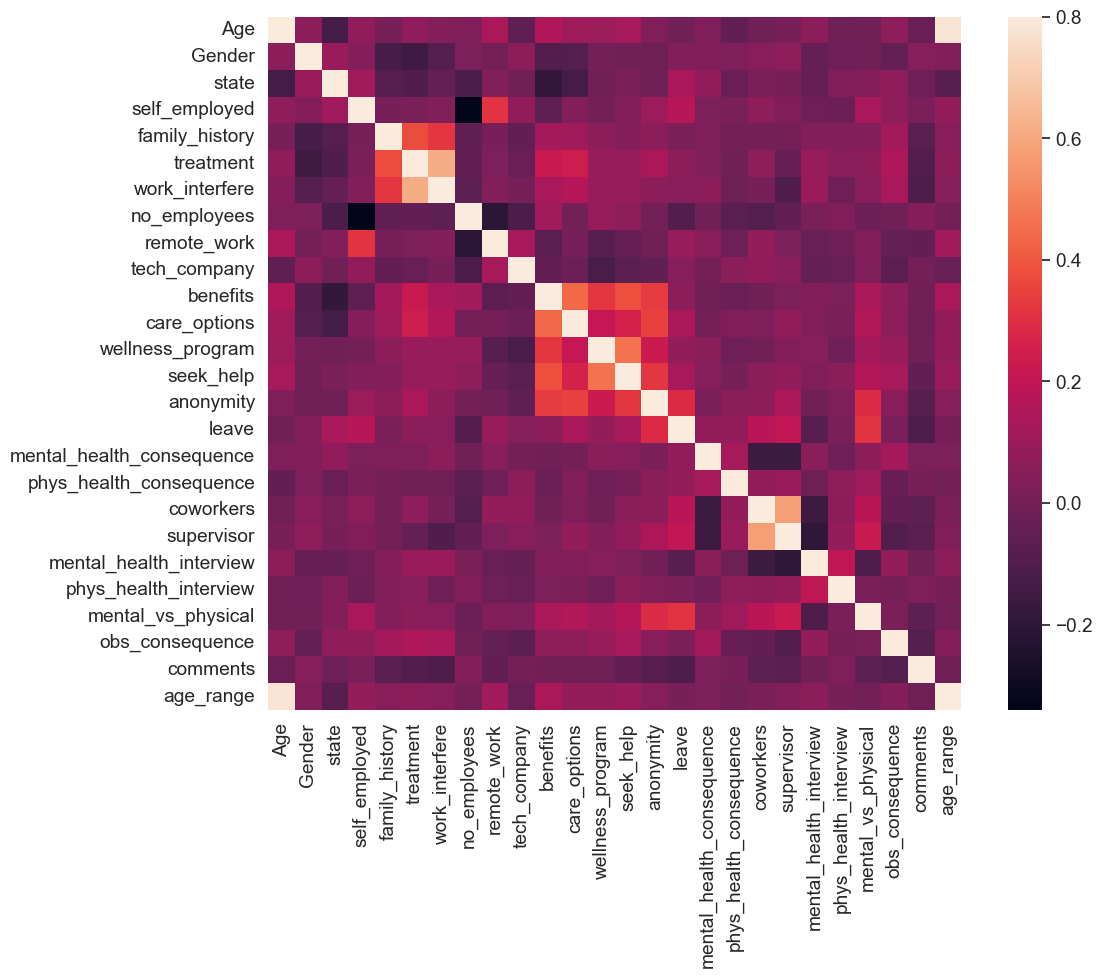

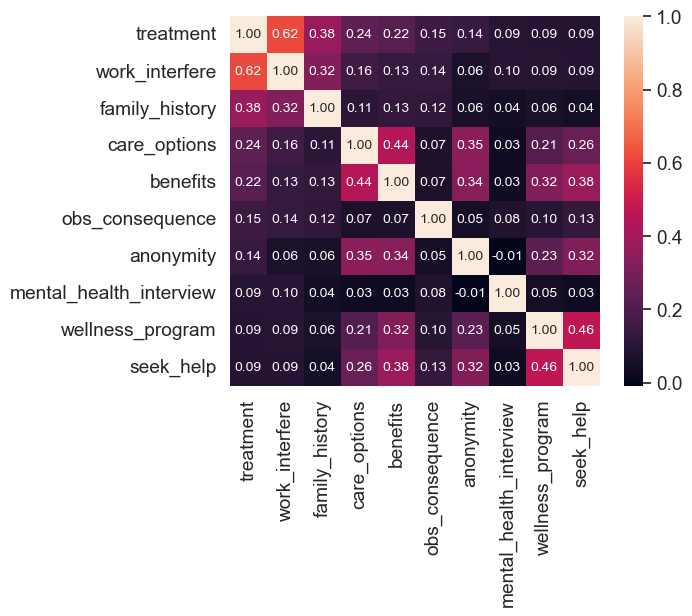

In [111]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [112]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

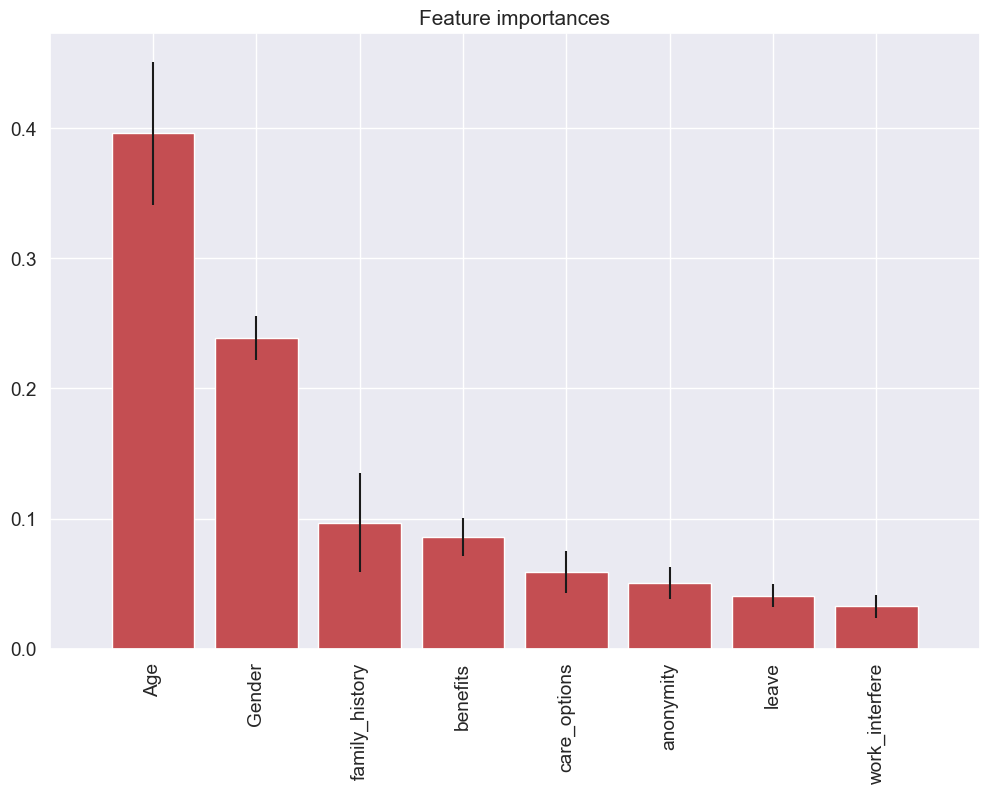

In [113]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()